# Proyecto: Detección de Anomalías - Unidad Generadora 02

En el contexto actual de operación de centrales hidroeléctricas, garantizar la confiabilidad de los generadores es clave para mantener la disponibilidad del servicio y optimizar los costos de mantenimiento. Este proyecto está dirigido a equipos de ingeniería de mantenimiento con el objetivo de anticipar fallas en componentes críticos.

La operación confiable de un generador depende del adecuado funcionamiento de componentes críticos como el cojinete axial, cuya falla puede implicar paradas no programadas que conllevan un alto impacto económico.

Este proyecto tiene como propósito analizar el comportamiento operativo de la unidad generadora ADT02 de una central hidroeléctrica, a partir del procesamiento de datos históricos provenientes de sensores instalados en la máquina. El foco está puesto en variables clave como la potencia activa, el caudal turbinado, la apertura del distribuidor, las temperaturas del cojinete axial (aceite, metal y agua) y las vibraciones.

El análisis busca identificar relaciones significativas entre estas variables que permitan interpretar fenómenos relevantes, como el rendimiento energético de la unidad o la detección temprana de condiciones anómalas en el sistema de refrigeración del cojinete axial.

# Preguntas e hipótesis

**Preguntas de interés**

- ¿Existe relación entre la potencia generada y el caudal turbinado?
- ¿Como se comportan las vibraciones en relación con la temperatura del cojinete?
- ¿Qué efecto tiene la apertura del distribuidor sobre la potencia y la temperatura del cojinete?
- ¿Las temperaturas del cojinete (metal y aceite) están correlacionadas?
- ¿Hay diferencias significativas de temperatura entre los distintos sensores del cojinete (x1 a x12)?
- ¿La eficiencia del sistema de enfriamiento (entrada vs salida de agua) varía en función del esfuerzo operativo?

**Hipótesis**

- H1: A mayor apertura del distribuidor, mayor potencia generada y mayor temperatura en los cojinetes.
- H2: Las temperaturas del metal y del aceite del cojinete axial se comportan de forma sincronizada (alta correlación).
- H3: Si el sistema de enfriamiento es eficiente, la diferencia entre la temperatura de entrada y salida del agua debe mantenerse constante.
- H4: A mayor incremento de vibraciones, mayor temperatura de cojinetes.

In [ ]:
!pip install missingno

In [2]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math

In [25]:
# Carga del dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Coder/DS1/dataset_gen2.csv', parse_dates=['Timestamp'])
print("Datos cargados")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Datos cargados


Se inspecciona el DF para revisar, nombres de columnas, cantidad de filas y columnas e información general.

In [26]:
df.shape

(8113, 32)

In [27]:
display(df.columns)

Index(['Timestamp', 'Potencia activa ADT02', 'Caudal Turbinado',
       'Nivel de cota de embalse',
       'Temperatura aceite caliente cojinete axial',
       'Temperatura aceite frio cojinete axial',
       'Temperatura entrada agua enfriam. aceite',
       'Temperatura salida agua  enfriam. aceite',
       'Temperatura bobinado fase U', 'Temperatura bobinado fase V',
       'Temperatura bobinado fase W', 'Apertura Distribuidor',
       'Temperatura metal cojinete Axial x1',
       'Temperatura metal cojinete Axial x2',
       'Temperatura metal cojinete Axial x3',
       'Temperatura metal cojinete Axial x4',
       'Temperatura metal cojinete Axial x5',
       'Temperatura metal cojinete Axial x6',
       'Temperatura metal cojinete Axial x7',
       'Temperatura metal cojinete Axial x8',
       'Temperatura metal cojinete Axial x9',
       'Temperatura metal cojinete Axial x10',
       'Temperatura metal cojinete Axial x11',
       'Temperatura metal cojinete Axial x12', 'Vibracio

In [28]:
#Se obtiene información de cada columna
df.info()

#Se observa que salvo el Timestamp todos los valores son de tipo float, por lo que no es necesario convertir ningún valor para poder trabajarlos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8113 entries, 0 to 8112
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype              
---  ------                                      --------------  -----              
 0   Timestamp                                   8113 non-null   datetime64[ns, UTC]
 1   Potencia activa ADT02                       8110 non-null   float64            
 2   Caudal Turbinado                            8110 non-null   float64            
 3   Nivel de cota de embalse                    8110 non-null   float64            
 4   Temperatura aceite caliente cojinete axial  8110 non-null   float64            
 5   Temperatura aceite frio cojinete axial      8110 non-null   float64            
 6   Temperatura entrada agua enfriam. aceite    8110 non-null   float64            
 7   Temperatura salida agua  enfriam. aceite    8110 non-null   float64            
 8   Temperatura bobinado fase U           

In [29]:
display(df.head())

Timestamp  Potencia activa ADT02  Caudal Turbinado  \
0 2024-07-01 03:00:00+00:00              -0.100243               0.0   
1 2024-07-01 03:30:00+00:00              -0.100243               0.0   
2 2024-07-01 04:00:00+00:00              -0.100243               0.0   
3 2024-07-01 04:30:00+00:00              -0.100243               0.0   
4 2024-07-01 05:00:00+00:00              -0.100243               0.0   

   Nivel de cota de embalse  Temperatura aceite caliente cojinete axial  \
0                   1337.12                                   12.795834   
1                   1337.12                                   12.795834   
2                   1337.12                                   12.795834   
3                   1337.12                                   12.795834   
4                   1337.12                                   12.795834   

   Temperatura aceite frio cojinete axial  \
0                               11.711283   
1                               11.711283   
2                               11.711283   
3                               11.711283   
4                               11.711283   

   Temperatura entrada agua enfriam. aceite  \
0                                 13.237692   
1                                 13.237692   
2                                 13.237692   
3                                 13.237692   
4                                 13.237692   

   Temperatura salida agua  enfriam. aceite  Temperatura bobinado fase U  \
0                                  21.15381                     34.53576   
1                                  21.15381                     34.53576   
2                                  21.15381                     34.53576   
3                                  21.15381                     34.53576   
4                                  21.15381                     34.53576   

   Temperatura bobinado fase V  ...  Temperatura metal cojinete Axial x11  \
0                    34.414635  ...                             30.740421   
1                    34.414635  ...                             30.740421   
2                    34.414635  ...                             30.740421   
3                    34.414635  ...                             30.740421   
4                    34.414635  ...                             30.740421   

   Temperatura metal cojinete Axial x12  Vibracion absoluta superior X  \
0                             30.700046                       0.145982   
1                             30.700046                       0.144642   
2                             30.700046                       0.143302   
3                             30.700046                       0.141961   
4                             30.700046                       0.140621   

   Vibracion absoluta turbina X  Vibracion relativa inferior X  \
0                      0.155278                       0.129989   
1                      0.153899                       0.129104   
2                      0.152520                       0.128219   
3                      0.151141                       0.127333   
4                      0.149762                       0.126448   

   Vibracion relativa inferior Y  Vibracion relativa superior X  \
0                       0.184281                       0.126116   
1                       0.155675                       0.098157   
2                       0.137150                       0.098100   
3                       0.118625                       0.097557   
4                       0.116289                       0.097014   

   Vibracion relativa superior Y  Vibracion relativa turbina X  \
0                       0.128255                      0.102553   
1                       0.127375                      0.101658   
2                       0.126496                      0.100762   
3                       0.125616                      0.099867   
4                       0.124737                      0.098971   

   Vibracion relat

In [30]:
df.describe().T

count         mean         std  \
Potencia activa ADT02                       8110.0    17.482574   28.253986   
Caudal Turbinado                            8110.0    16.136416   25.924869   
Nivel de cota de embalse                    8110.0  1335.138580    1.852592   
Temperatura aceite caliente cojinete axial  8110.0    23.367033   12.957150   
Temperatura aceite frio cojinete axial      8110.0    16.602385    5.740888   
Temperatura entrada agua enfriam. aceite    8110.0    12.981320    3.441044   
Temperatura salida agua  enfriam. aceite    8110.0    17.145497    5.657531   
Temperatura bobinado fase U                 8110.0    43.432277   17.299594   
Temperatura bobinado fase V                 8110.0    43.416667   17.711594   
Temperatura bobinado fase W                 8110.0    45.996784   18.388320   
Apertura Distribuidor                       8110.0    17.198812   27.290299   
Temperatura metal cojinete Axial x1         8110.0    41.478298   19.603289   
Temperatura metal cojinete Axial x2         8110.0    41.164304   18.944538   
Temperatura metal cojinete Axial x3         8110.0    41.362835   19.366600   
Temperatura metal cojinete Axial x4         8110.0    41.688406   19.843244   
Temperatura metal cojinete Axial x5         8110.0    40.579675   18.042267   
Temperatura metal cojinete Axial x6         8110.0    40.576233   18.520567   
Temperatura metal cojinete Axial x7         8110.0    40.802942   18.836458   
Temperatura metal cojinete Axial x8         8110.0    40.931111   18.954903   
Temperatura metal cojinete Axial x9         8110.0    41.243425   19.347577   
Temperatura metal cojinete Axial x10        8110.0    41.245679   19.136011   
Temperatura metal cojinete Axial x11        8110.0    41.247634   19.077010   
Temperatura metal cojinete Axial x12        8110.0    41.012450   18.817501   
Vibracion absoluta superior X               8103.0     0.368456    0.348804   
Vibracion absoluta turbina X                8103.0     0.229002    0.146213   
Vibracion relativa inferior X               8103.0    59.284013   97.668922   
Vibracion relativa inferior Y               8103.0    57.264354   93.946889   
Vibracion relativa superior X               8103.0    60.615453   99.143223   
Vibracion relativa superior Y               8103.0    52.374113   85.675677   
Vibracion relativa turbina X                8103.0    75.194964  123.757503   
Vibracion relativa turbina Y                8103.0    76.756878  126.500812   

                                                    min          25%  \
Potencia activa ADT02                         -0.165472    -0.126335   
Caudal Turbinado                              -0.111792     0.000000   
Nivel de cota de embalse                    1300.000000  1333.950000   
Temperatura aceite caliente cojinete axial     9.383119    13.639362   
Temperatura aceite frio cojinete axial         8.501669    11.831784   
Temperatura entrada agua enfriam. aceite       6.418277    11.028422   
Temperatura salida agua  enfriam. aceite       5.697103    12.434310   
Temperatura bobinado fase U                   10.827587    31.759901   
Temperatura bobinado fase V                   10.385730    31.426811   
Temperatura bobinado fase W                   12.273642    33.415321   
Apertura Distribuidor                         -0.002349     0.024634   
Temperatura metal cojinete Axial x1           12.594998    28.251723   
Temperatura metal cojinete Axial x2           12.755667    28.402739   
Temperatura metal cojinete Axial x3           12.675332    28.322197   
Temperatura metal cojinete Axial x4           12.635165    28.291995   
Temperatura metal cojinete Axial x5           12.795834    28.483280   
Temperatura metal cojinete Axial x6           12.514664    28.130911   
Temperatura metal cojinete Axial x7           12.514664    28.120844   
Temperatura metal cojinete Axial x8           12.554832    28.161114   
Temperatura metal cojinete Axial x9           12.594998    28.201386   
Temp

# Data Wrangling

In [31]:
#Se renombran las columnas de acuerdo con las mejores prácticas
df.columns = (
    df.columns
    .str.strip()                      # quitar espacios al principio y al final
    .str.lower()                     # pasar todo a minúscula
    .str.replace(' ', '_')          # reemplazar espacios por guiones bajos
    .str.replace(r'[^\w\s]', '', regex=True)  # eliminar caracteres especiales
)

In [32]:
#Valores duplicados
df.duplicated().sum()

np.int64(0)

Se observa que no hay valores duplicados, por lo tanto no se toma ninguna acción en relación a esto.

149


<Axes: >

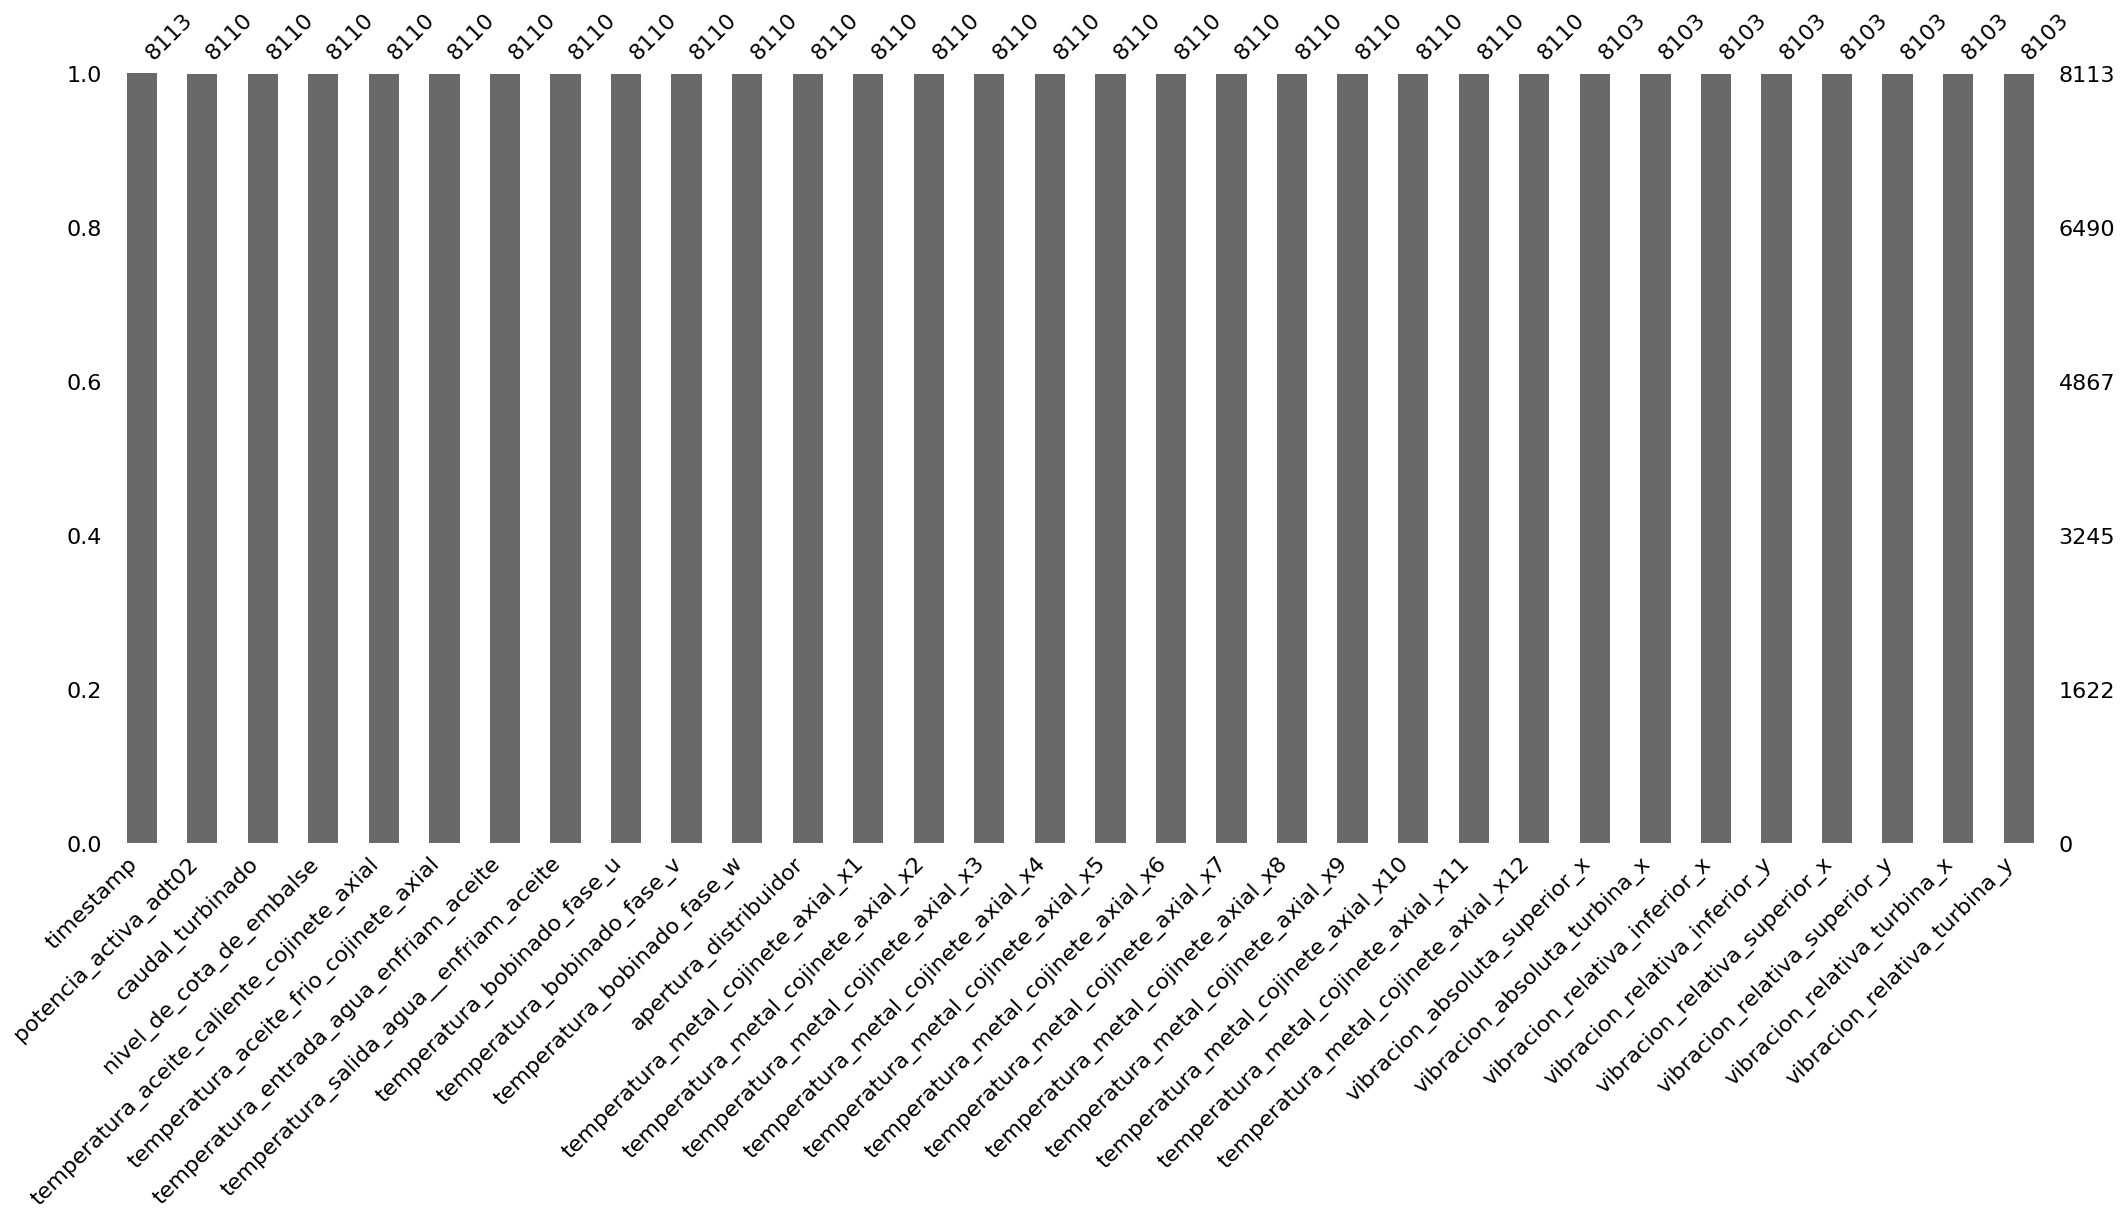

In [33]:
#Valores nulos
nulos = df.isnull().sum().sum()
print(nulos)
msno.bar(df)

Debido a la baja cantidad de valores nulos se decide elimininarlos porque no altera el conjunto de datos.

In [34]:
#Se eliminan los nulos
df.dropna(inplace=True)
#Se observa el resultado
df.shape

(8100, 32)

Se observa un total de 8100 filas de 8113 que tenía originalmente.

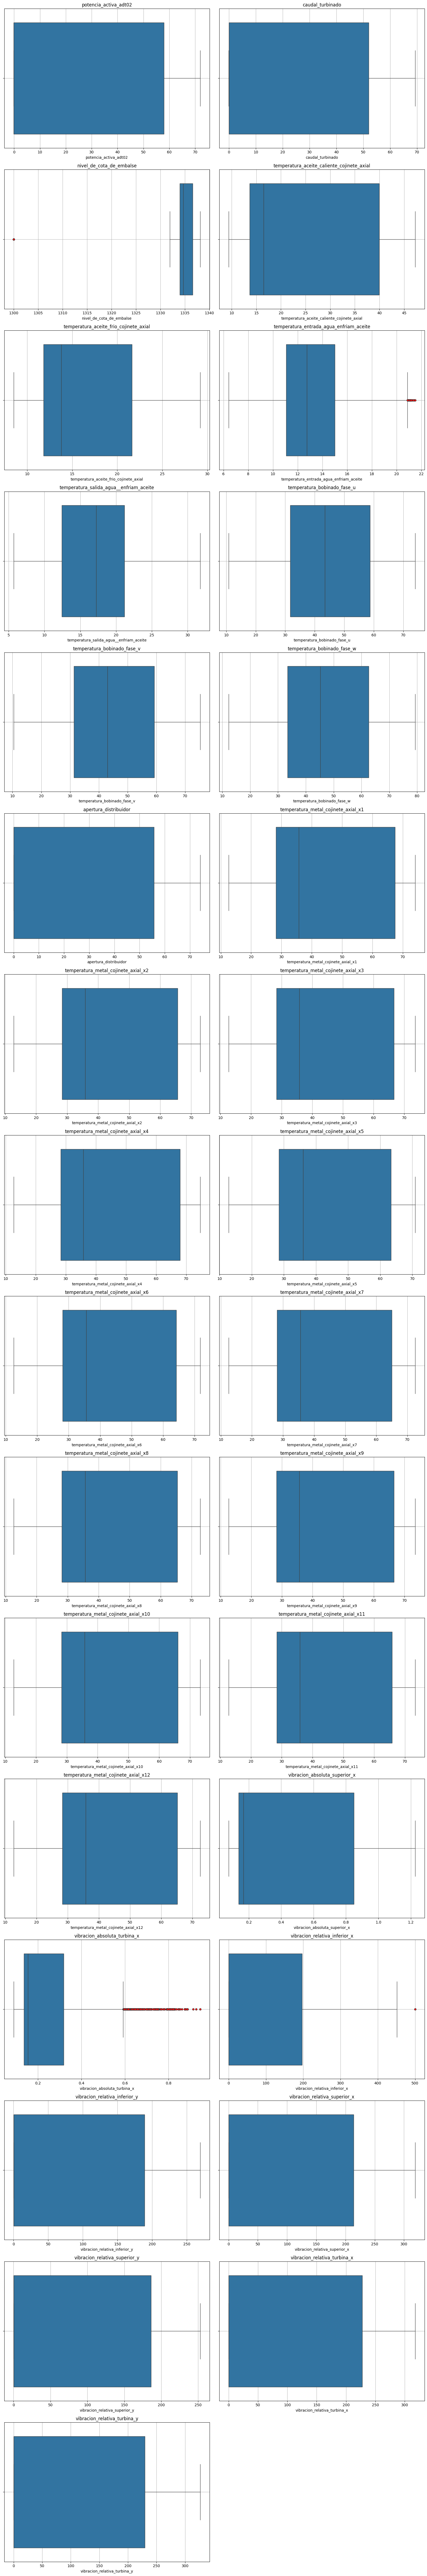

In [35]:
#Revisión de outliers
def ver_boxplots(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 2
    n_rows = math.ceil(len(numeric_cols) / n_cols)

    plt.figure(figsize=(16, 6 * n_rows))

    flier_props = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

    for i, column in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(x=df[column], orient="y",flierprops=flier_props)
        plt.title(f'{column}')
        plt.grid(True)
        plt.tight_layout()

    plt.show()

ver_boxplots(df)

Se identifica que hay outlier en la medición de nivel de cota de embalse. Por ser una variable que no puede presentar ese tipo de escalones es muy probable que sea un error. Se procede a graficar una distribución de ésta.

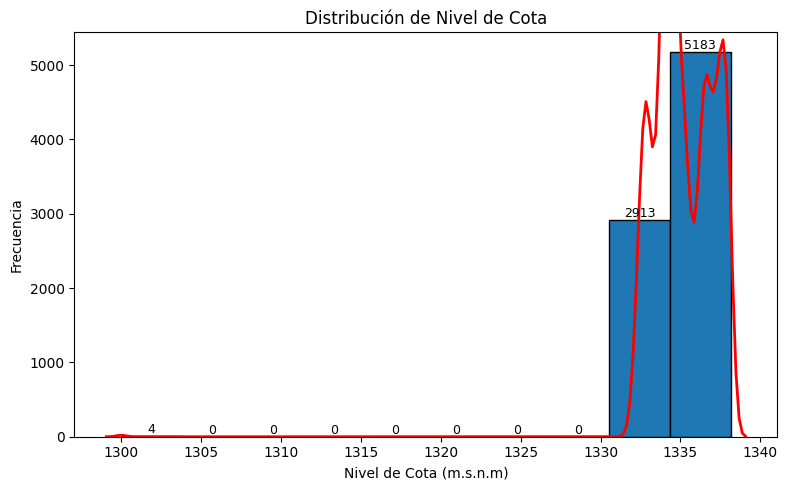

In [36]:
# Datos
x = df['nivel_de_cota_de_embalse']
# Crear figura y eje
fig, ax = plt.subplots(figsize=(8, 5))

# Histograma
counts, bins, bars = ax.hist(x, edgecolor='black')

# Etiquetas
ax.bar_label(bars, fmt='%d', fontsize=9)

# Calcular curva KDE
kde = sns.kdeplot(x, bw_adjust=1, ax=ax, color='red', linewidth=2)

# Escalar la KDE para que coincida con la escala del histograma
kde_y = kde.get_lines()[0].get_data()[1]
kde_x = kde.get_lines()[0].get_data()[0]

# Escalado manual: multiplicar la densidad por el área total del histograma
area = sum(np.diff(bins) * counts)
ax.lines[-1].set_ydata(kde_y * area)

# Títulos y etiquetas
ax.set_title('Distribución de Nivel de Cota')
ax.set_xlabel('Nivel de Cota (m.s.n.m)')
ax.set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Se procede a eliminar los registros donde el nivel es 1300. Para el caso de vibraciones y temperatura se decide mantener
porque puede representar algo importante.

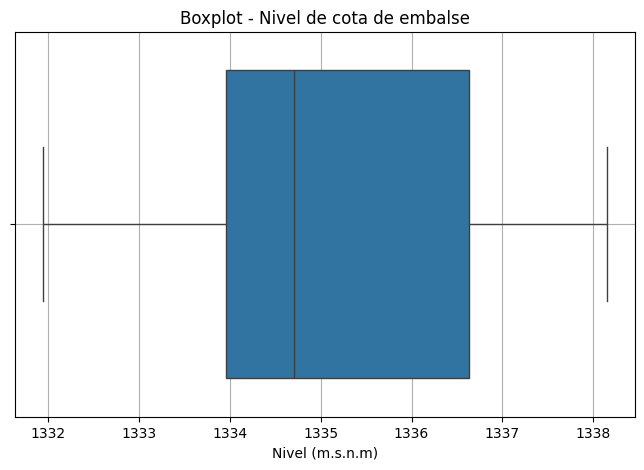

In [39]:
#Se elimina los registros para la cota 1300
df = df[df['nivel_de_cota_de_embalse'] != 1300]

#Se grafica nuevamente el boxplot para esta variable
flier_props = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['nivel_de_cota_de_embalse'], orient="y", flierprops=flier_props)
plt.title("Boxplot - Nivel de cota de embalse")
plt.xlabel("Nivel (m.s.n.m)")
plt.grid(True)
plt.show()


Por otro lado, revisando el boxplot y el cuadro de las estadísticas descriptivas, se observa que hay una gran cantidad de valores de potencia activa que tienen valor negativo. Se procede a analizarlo.

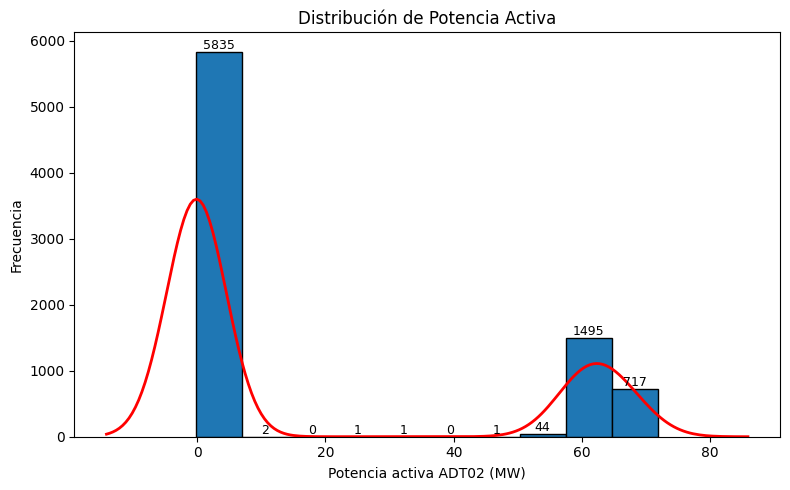

In [40]:
# Datos
x = df['potencia_activa_adt02']
# Crear figura y eje
fig, ax = plt.subplots(figsize=(8, 5))

# Histograma (sin normalizar)
counts, bins, bars = ax.hist(x, edgecolor='black')

# Etiquetas
ax.bar_label(bars, fmt='%d', fontsize=9)

# Calcular curva KDE
kde = sns.kdeplot(x, bw_adjust=1, ax=ax, color='red', linewidth=2)

# Escalar la KDE para que coincida con la escala del histograma
kde_y = kde.get_lines()[0].get_data()[1]
kde_x = kde.get_lines()[0].get_data()[0]

# Escalado manual: multiplicar la densidad por el área total del histograma
area = sum(np.diff(bins) * counts)
ax.lines[-1].set_ydata(kde_y * area)

# Títulos y etiquetas
ax.set_title('Distribución de Potencia Activa')
ax.set_xlabel('Potencia activa ADT02 (MW)')
ax.set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Se observa que hay existen valores que corresponden a un error de lectura cuando el generador está detenido. Se procede
a eliminar todos los registros cuando la potencia activa sea menor a 50.

In [44]:
#Se elimina los registros para potencia activa menor a 50
df = df[df["potencia_activa_adt02"] > 50]
df.shape

(2256, 32)

Se observa que se reduce drásticamente la cantidad de registros gracias a esta limpieza.

In [45]:
# Descripción del dataset luego de la limpieza realizada
df.describe().T

count         mean         std  \
potencia_activa_adt02                       2256.0    62.658197    3.388226   
caudal_turbinado                            2256.0    57.561396    3.540362   
nivel_de_cota_de_embalse                    2256.0  1334.349699    1.496214   
temperatura_aceite_caliente_cojinete_axial  2256.0    42.823818    2.984382   
temperatura_aceite_frio_cojinete_axial      2256.0    24.395662    2.464625   
temperatura_entrada_agua_enfriam_aceite     2256.0     9.929411    2.495729   
temperatura_salida_agua__enfriam_aceite     2256.0    11.908153    2.604932   
temperatura_bobinado_fase_u                 2256.0    62.929194    6.625805   
temperatura_bobinado_fase_v                 2256.0    63.646690    6.861020   
temperatura_bobinado_fase_w                 2256.0    67.521236    7.092459   
apertura_distribuidor                       2256.0    60.809939    3.296416   
temperatura_metal_cojinete_axial_x1         2256.0    69.980154    2.801029   
temperatura_metal_cojinete_axial_x2         2256.0    68.528975    2.996376   
temperatura_metal_cojinete_axial_x3         2256.0    69.478422    2.895799   
temperatura_metal_cojinete_axial_x4         2256.0    70.619288    2.857767   
temperatura_metal_cojinete_axial_x5         2256.0    66.350097    3.066399   
temperatura_metal_cojinete_axial_x6         2256.0    67.206438    3.044348   
temperatura_metal_cojinete_axial_x7         2256.0    67.986515    3.097954   
temperatura_metal_cojinete_axial_x8         2256.0    68.317556    2.995902   
temperatura_metal_cojinete_axial_x9         2256.0    69.318771    2.915987   
temperatura_metal_cojinete_axial_x10        2256.0    68.963859    2.932004   
temperatura_metal_cojinete_axial_x11        2256.0    68.841752    3.044669   
temperatura_metal_cojinete_axial_x12        2256.0    68.145510    2.969279   
vibracion_absoluta_superior_x               2256.0     0.824713    0.277028   
vibracion_absoluta_turbina_x                2256.0     0.394846    0.144913   
vibracion_relativa_inferior_x               2256.0   189.100271   78.779336   
vibracion_relativa_inferior_y               2256.0   181.821140   74.821755   
vibracion_relativa_superior_x               2256.0   191.598000   78.331070   
vibracion_relativa_superior_y               2256.0   165.478385   67.545269   
vibracion_relativa_turbina_x                2256.0   239.886259   99.666288   
vibracion_relativa_turbina_y                2256.0   244.838335  102.040196   

                                                    min          25%  \
potencia_activa_adt02                         54.312400    60.023059   
caudal_turbinado                              48.329440    54.817040   
nivel_de_cota_de_embalse                    1331.940000  1333.037500   
temperatura_aceite_caliente_cojinete_axial    19.503935    41.403280   
temperatura_aceite_frio_cojinete_axial        11.430114    22.472713   
temperatura_entrada_agua_enfriam_aceite        6.418277     8.381476   
temperatura_salida_agua__enfriam_aceite        6.498405    10.225061   
temperatura_bobinado_fase_u                   19.463768    58.693024   
temperatura_bobinado_fase_v                   18.981762    59.303394   
temperatura_bobinado_fase_w                   21.032999    62.965622   
apertura_distribuidor                         52.021880    58.135897   
temperatura_metal_cojinete_axial_x1           43.670197    69.110010   
temperatura_metal_cojinete_axial_x2           42.172424    67.482346   
temperatura_metal_cojinete_axial_x3           43.589237    68.458950   
temperatura_metal_cojinete_axial_x4           43.913070    69.639000   
temperatura_metal_cojinete_axial_x5           40.431755    65.285020   
temperatura_metal_cojinete_axial_x6           40.350796    66.139534   
temperatura_metal_cojinete_axial_x7           40.512714    66.912680   
temperatura_metal_cojinete_axial_x8           42.010487    67.319580   
temperatura_metal_cojinete_axial_x9           43.427300    68.377560   
temp

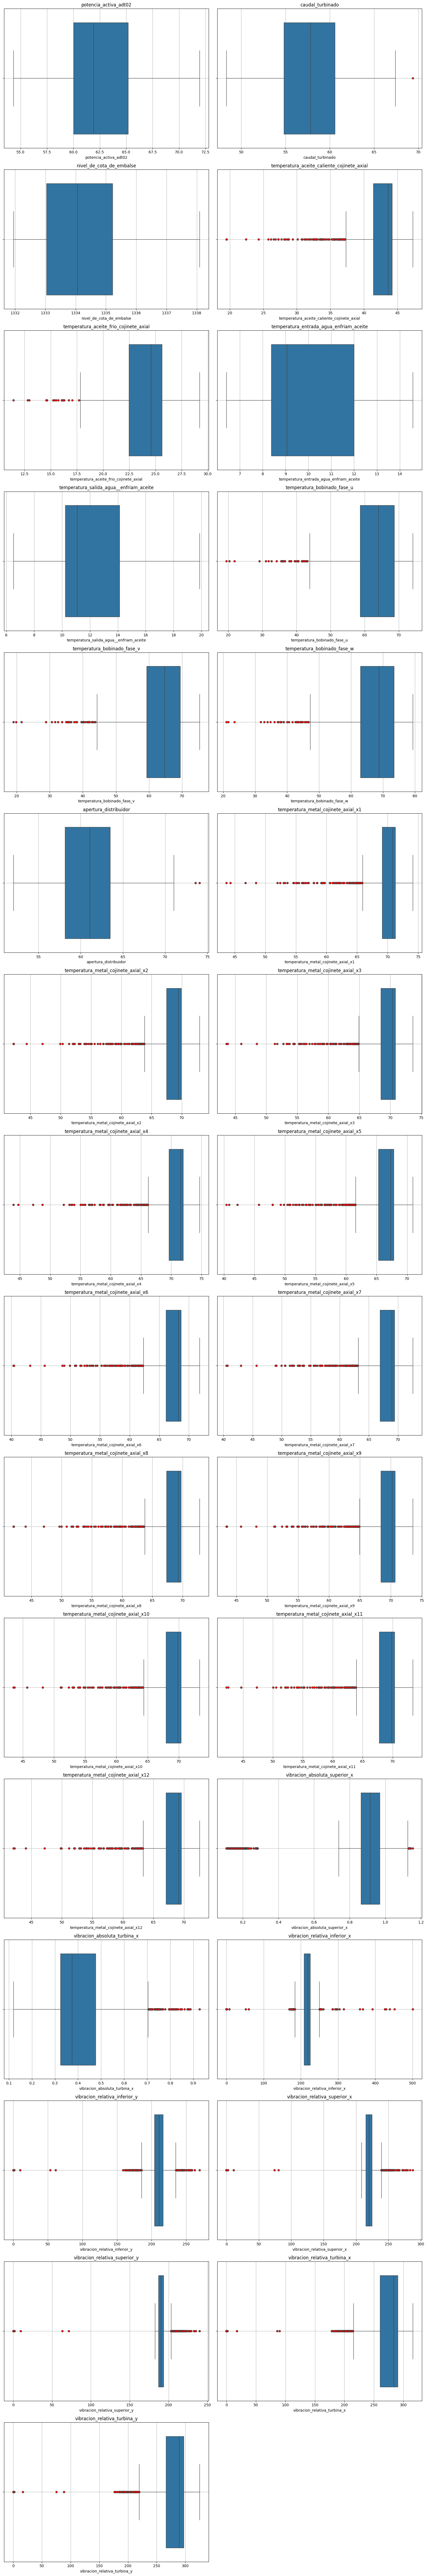

In [46]:
#Revisión de outliers
def ver_boxplots(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 2
    n_rows = math.ceil(len(numeric_cols) / n_cols)

    plt.figure(figsize=(16, 6 * n_rows))

    flier_props = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

    for i, column in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(x=df[column], orient="y",flierprops=flier_props)
        plt.title(f'{column}')
        plt.grid(True)
        plt.tight_layout()

    plt.show()

ver_boxplots(df)

# EDA (Análisis exploratorio de datos)

Se procede a graficar las distribuciones de todas las variables para revisar su comportamiento.

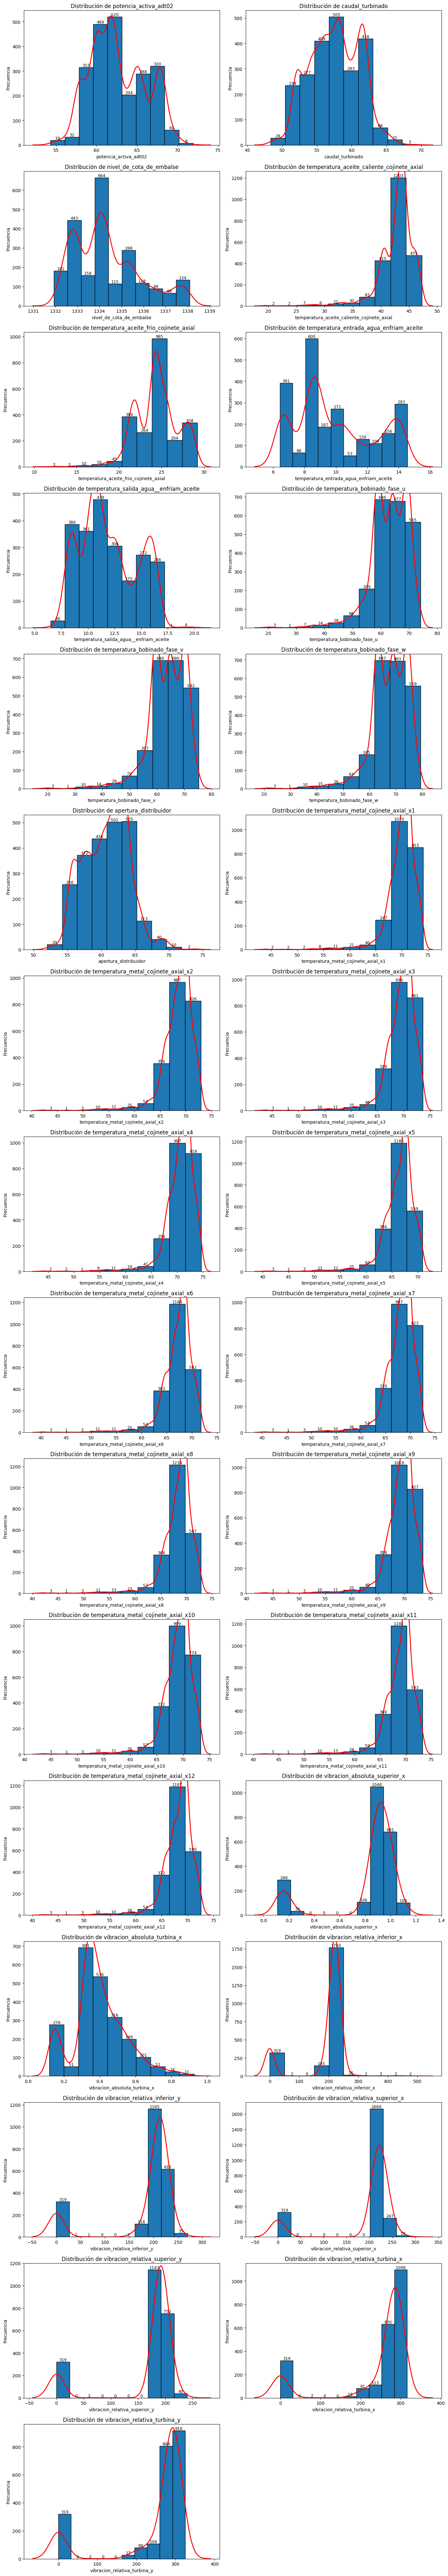

In [47]:
# Seleccionar variables numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Definir número de columnas por fila
cols_per_row = 2
n_cols = cols_per_row
n_rows = int(np.ceil(len(numeric_columns) / cols_per_row))

# Crear figura general
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

# Iterar sobre variables
for i, col in enumerate(numeric_columns):
    ax = axes[i]
    x = df[col].dropna()

    # Histograma
    counts, bins, bars = ax.hist(x, edgecolor='black')
    ax.bar_label(bars, fmt='%d', fontsize=9)

    # KDE
    kde = sns.kdeplot(x, bw_adjust=1, ax=ax, color='red', linewidth=2)
    kde_y = kde.get_lines()[0].get_data()[1]
    kde_x = kde.get_lines()[0].get_data()[0]
    area = sum(np.diff(bins) * counts)
    ax.lines[-1].set_ydata(kde_y * area)

    # Etiquetas
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Eliminar ejes sobrantes si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Se observa principalmente que todas las Temperaturas metal cojinete Axial xN tienen una dsitribución con sesgo hacia la izquierda y mantienen una forma muy similar entre ellas. Esto está asociado a la etapa de entrada en calor de los metales hasta que la máquina logra su régimen de operación.

P1: ¿Existe relación entre la potencia generada y el caudal turbinado?

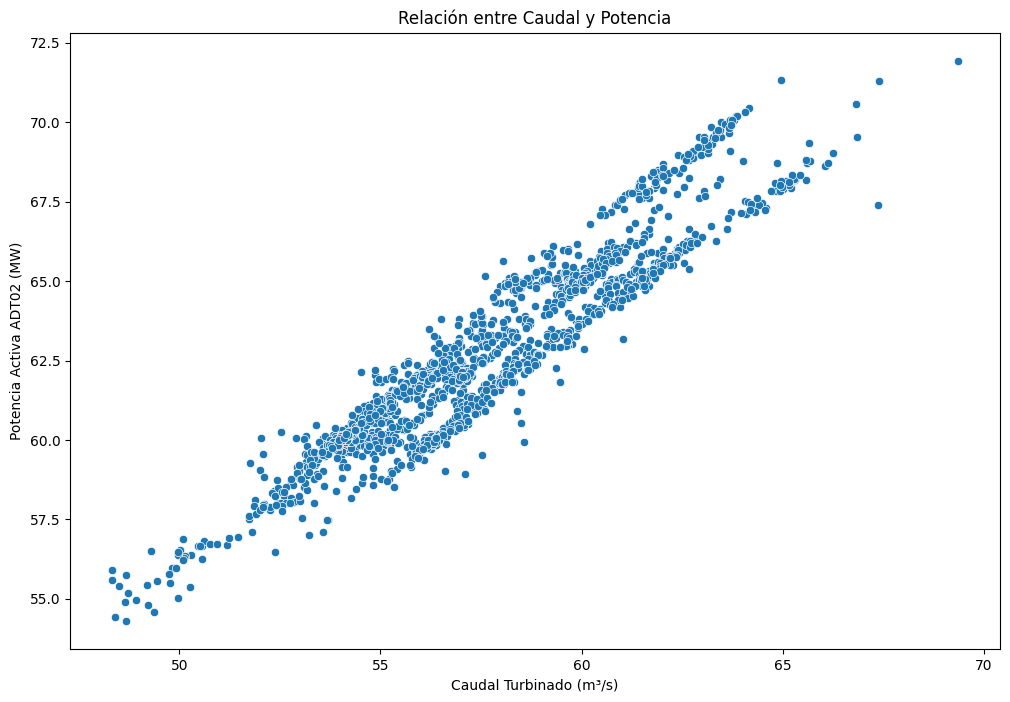

In [49]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='caudal_turbinado', y='potencia_activa_adt02')
plt.title('Relación entre Caudal y Potencia')
plt.xlabel('Caudal Turbinado (m³/s)')
plt.ylabel('Potencia Activa ADT02 (MW)')
plt.show()

#df[['Caudal Turbinado', 'Potencia activa ADT02']].corr()


Se observa que efectivamente hay una relación directamente proporcional entre la potencia y caudal turbinado.

P2: ¿Como se comportan las vibraciones en relación con la temperatura del cojinete?

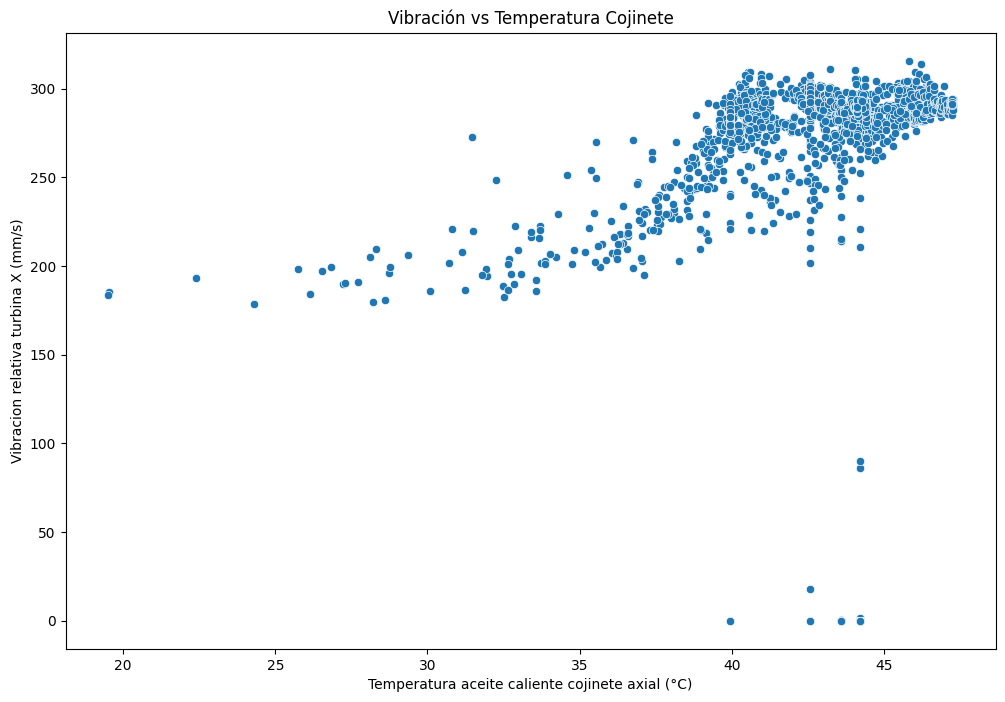

In [51]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='temperatura_aceite_caliente_cojinete_axial', y='vibracion_relativa_turbina_x')
plt.title('Vibración vs Temperatura Cojinete')
plt.xlabel('Temperatura aceite caliente cojinete axial (°C)')
plt.ylabel('Vibracion relativa turbina X (mm/s)')
plt.show()

A medida que la temperatura aumenta, la vibración también lo hace, pero se estabiliza alrededor de 250–300 mm/s cuando la temperatura pasa los 38 °C. Esto sugiere un límite físico o efecto de control automático.
Se observan algunos outliers, con:
- Temperaturas elevadas y vibraciones muy bajas (posible error).
- Temperaturas normales con vibraciones altas.

Esto responde a la **hipótesis 4** (A mayor incremento de vibraciones, mayor temperatura de cojinetes) indicando que no se cumple porque tiende a estabilizarse.

P3: ¿Qué efecto tiene la apertura del distribuidor sobre la potencia y la temperatura del cojinete?

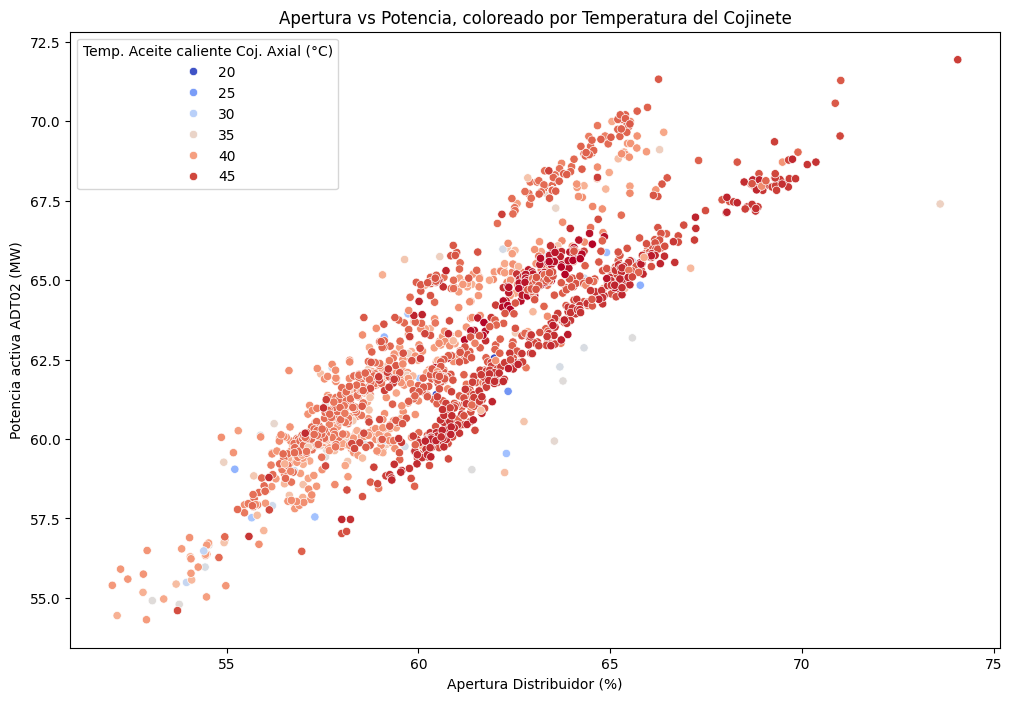

In [52]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='apertura_distribuidor',
    y='potencia_activa_adt02',
    hue='temperatura_aceite_caliente_cojinete_axial',
    palette='coolwarm'
)
plt.title("Apertura vs Potencia, coloreado por Temperatura del Cojinete")
plt.xlabel('Apertura Distribuidor (%)')
plt.ylabel('Potencia activa ADT02 (MW)')
plt.legend(title='Temp. Aceite caliente Coj. Axial (°C)')
plt.show()

Se observa que al aumentar la apertura del distribuidor (básicamente que ingrese mas agua a la turbina), aumenta la potencia y por consiguiente la temperatura del cojinete. Para un generador con régimen de funcionamiento habitual entre los 60 y 65 MW, la temperatura del cojinete predomina el rango de los 40 a 45 °C. Para este caso no se observan outliers.

Esto responde a la **hipótesis 1** (A mayor apertura del distribuidor, mayor potencia generada y mayor temperatura en los cojinetes).

P4: ¿Las temperaturas del cojinete (metal y aceite) están correlacionadas?

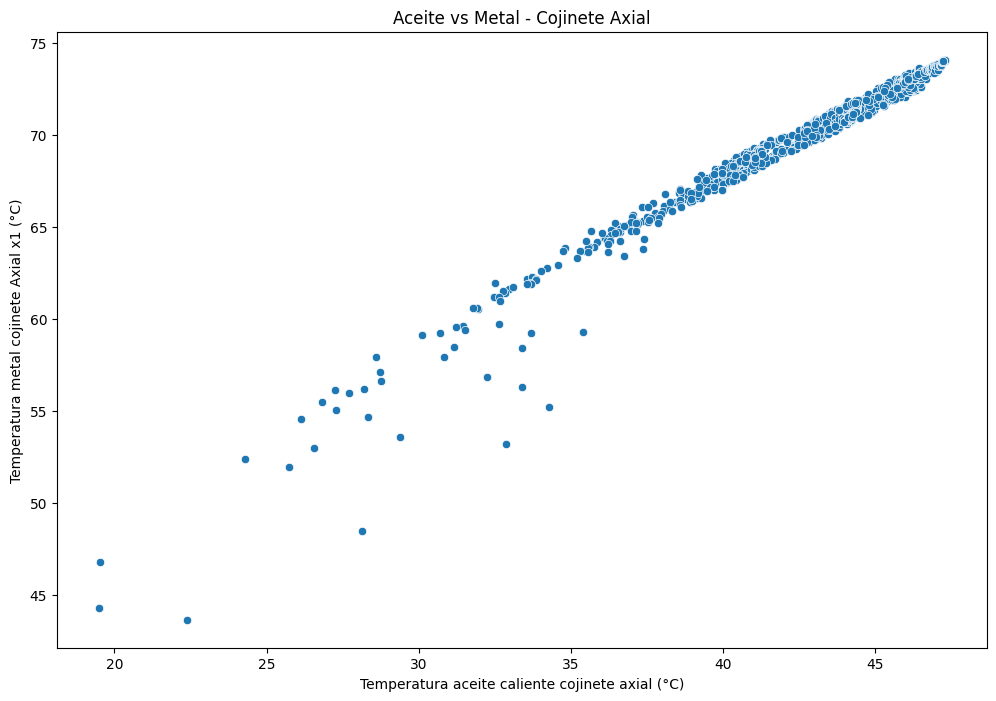

In [53]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='temperatura_aceite_caliente_cojinete_axial', y='temperatura_metal_cojinete_axial_x1')
plt.title('Aceite vs Metal - Cojinete Axial')
plt.xlabel('Temperatura aceite caliente cojinete axial (°C)')
plt.ylabel('Temperatura metal cojinete Axial x1 (°C)')
plt.show()

#df[['Temperatura aceite caliente cojinete axial', 'Temperatura metal cojinete Axial x1']].corr()

Esto sugiere que ambas variables están altamente correlacionadas. Mas adelante, en la matriz de correlación, se podrá ver este comportamiento
con cada una de las mediciones que se realizan en el metal del cojinete axial desde x1 a x12.

Esta relación puede ser útil para diagnóstico predictivo:
- Si en algún momento la temperatura del metal sube sin que suba la del aceite, podría indicar problemas de lubricación o transferencia de calor defectuosa.

Además, este tipo de gráfico también puede servir como base para construir un modelo de regresión que estime la temperatura del metal en función del aceite.

Nuevamente se confirma la **hipótesis 2** (Las temperaturas del metal y del aceite del cojinete axial se comportan de forma sincronizada (alta correlación)).

P5: ¿Hay diferencias significativas de temperatura entre los distintos sensores del cojinete (x1 a x12)?

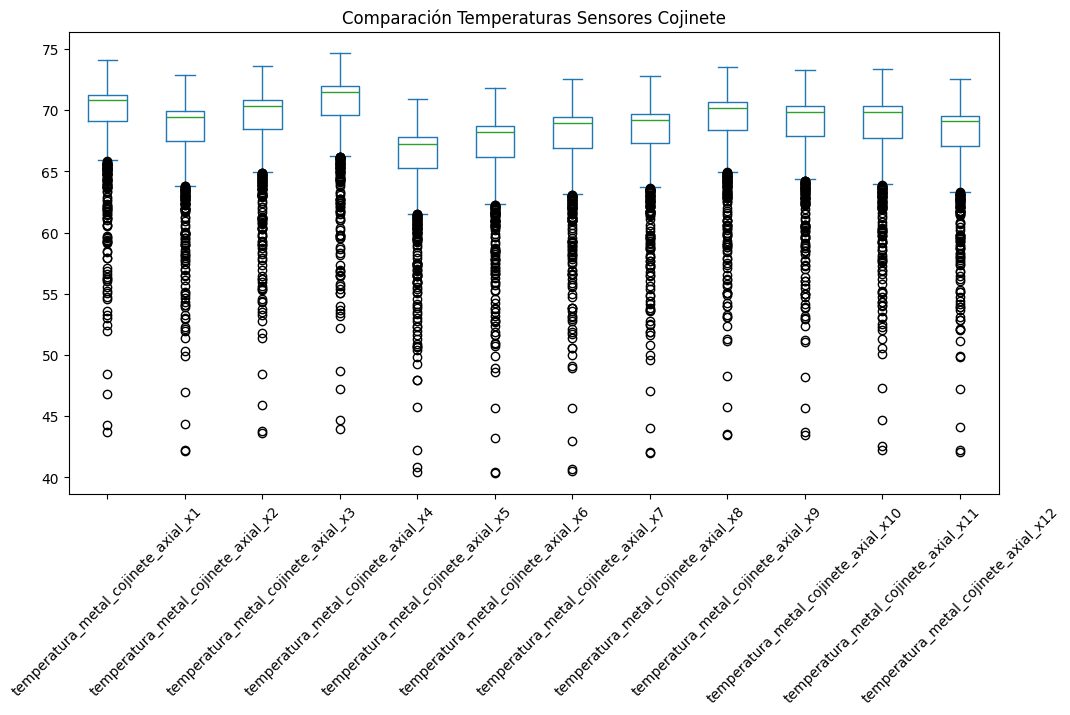

In [54]:
# Si tenés columnas tipo Temperatura x1, x2, ..., x12
cols_temp = [col for col in df.columns if "temperatura_metal_cojinete_axial_x" in col]
df[cols_temp].plot(kind='box', figsize=(12, 6), title='Comparación Temperaturas Sensores Cojinete')
plt.xticks(rotation=45)
plt.show()

Este gráfico permite visualizar la variabilidad en las mediciones de temperatura del cojinete axial para cada uno de los 12 sensores. Con esta información se puede
profundizar en la calidad de las mediciones y calibración de instrumentos si fuese necesaria.
Los outliers que se observan tienen que ver con la entrada en calor de la máquina.

P6: ¿La eficiencia del sistema de enfriamiento (entrada vs salida de agua) varía en función del esfuerzo operativo?

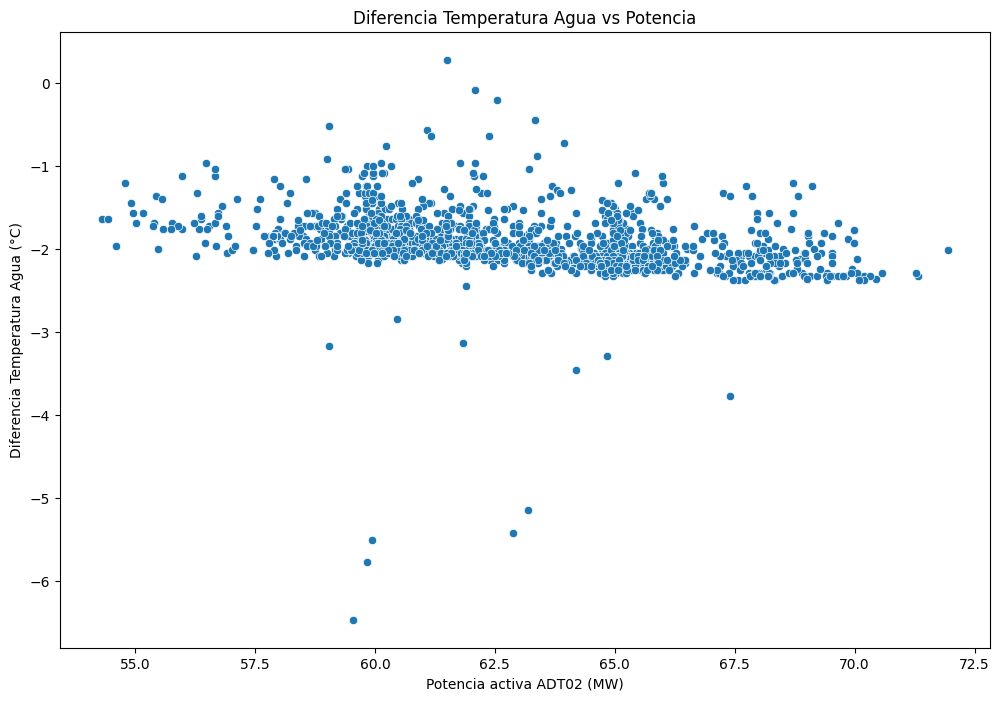

In [60]:
#Sistema de enfriamiento
plt.figure(figsize=(12, 8))
df['diferencia_temp_agua'] = df['temperatura_entrada_agua_enfriam_aceite'] - df['temperatura_salida_agua__enfriam_aceite']
sns.scatterplot(data=df, x='potencia_activa_adt02', y='diferencia_temp_agua')
plt.title('Diferencia Temperatura Agua vs Potencia')
plt.xlabel('Potencia activa ADT02 (MW)')
plt.ylabel('Diferencia Temperatura Agua (°C)')
plt.show()

Se observa que el sistema térmico mantiene el delta de temperatura constante independientemente de la carga. A primera vista sugiere que el sistema de enfriamiento esta dimensionado correctamente.
Hay varios puntos con diferencias muy negativas (hasta -6 °C) que se apartan fuertemente del grupo. Podrían indicar lecturas anómalas incorrectas.

Se podría pensar que responde satisfactoriamente a la **hipótesis 3** (Si el sistema de enfriamiento es eficiente, la diferencia entre la temperatura de entrada y salida del agua debe mantenerse constante.)

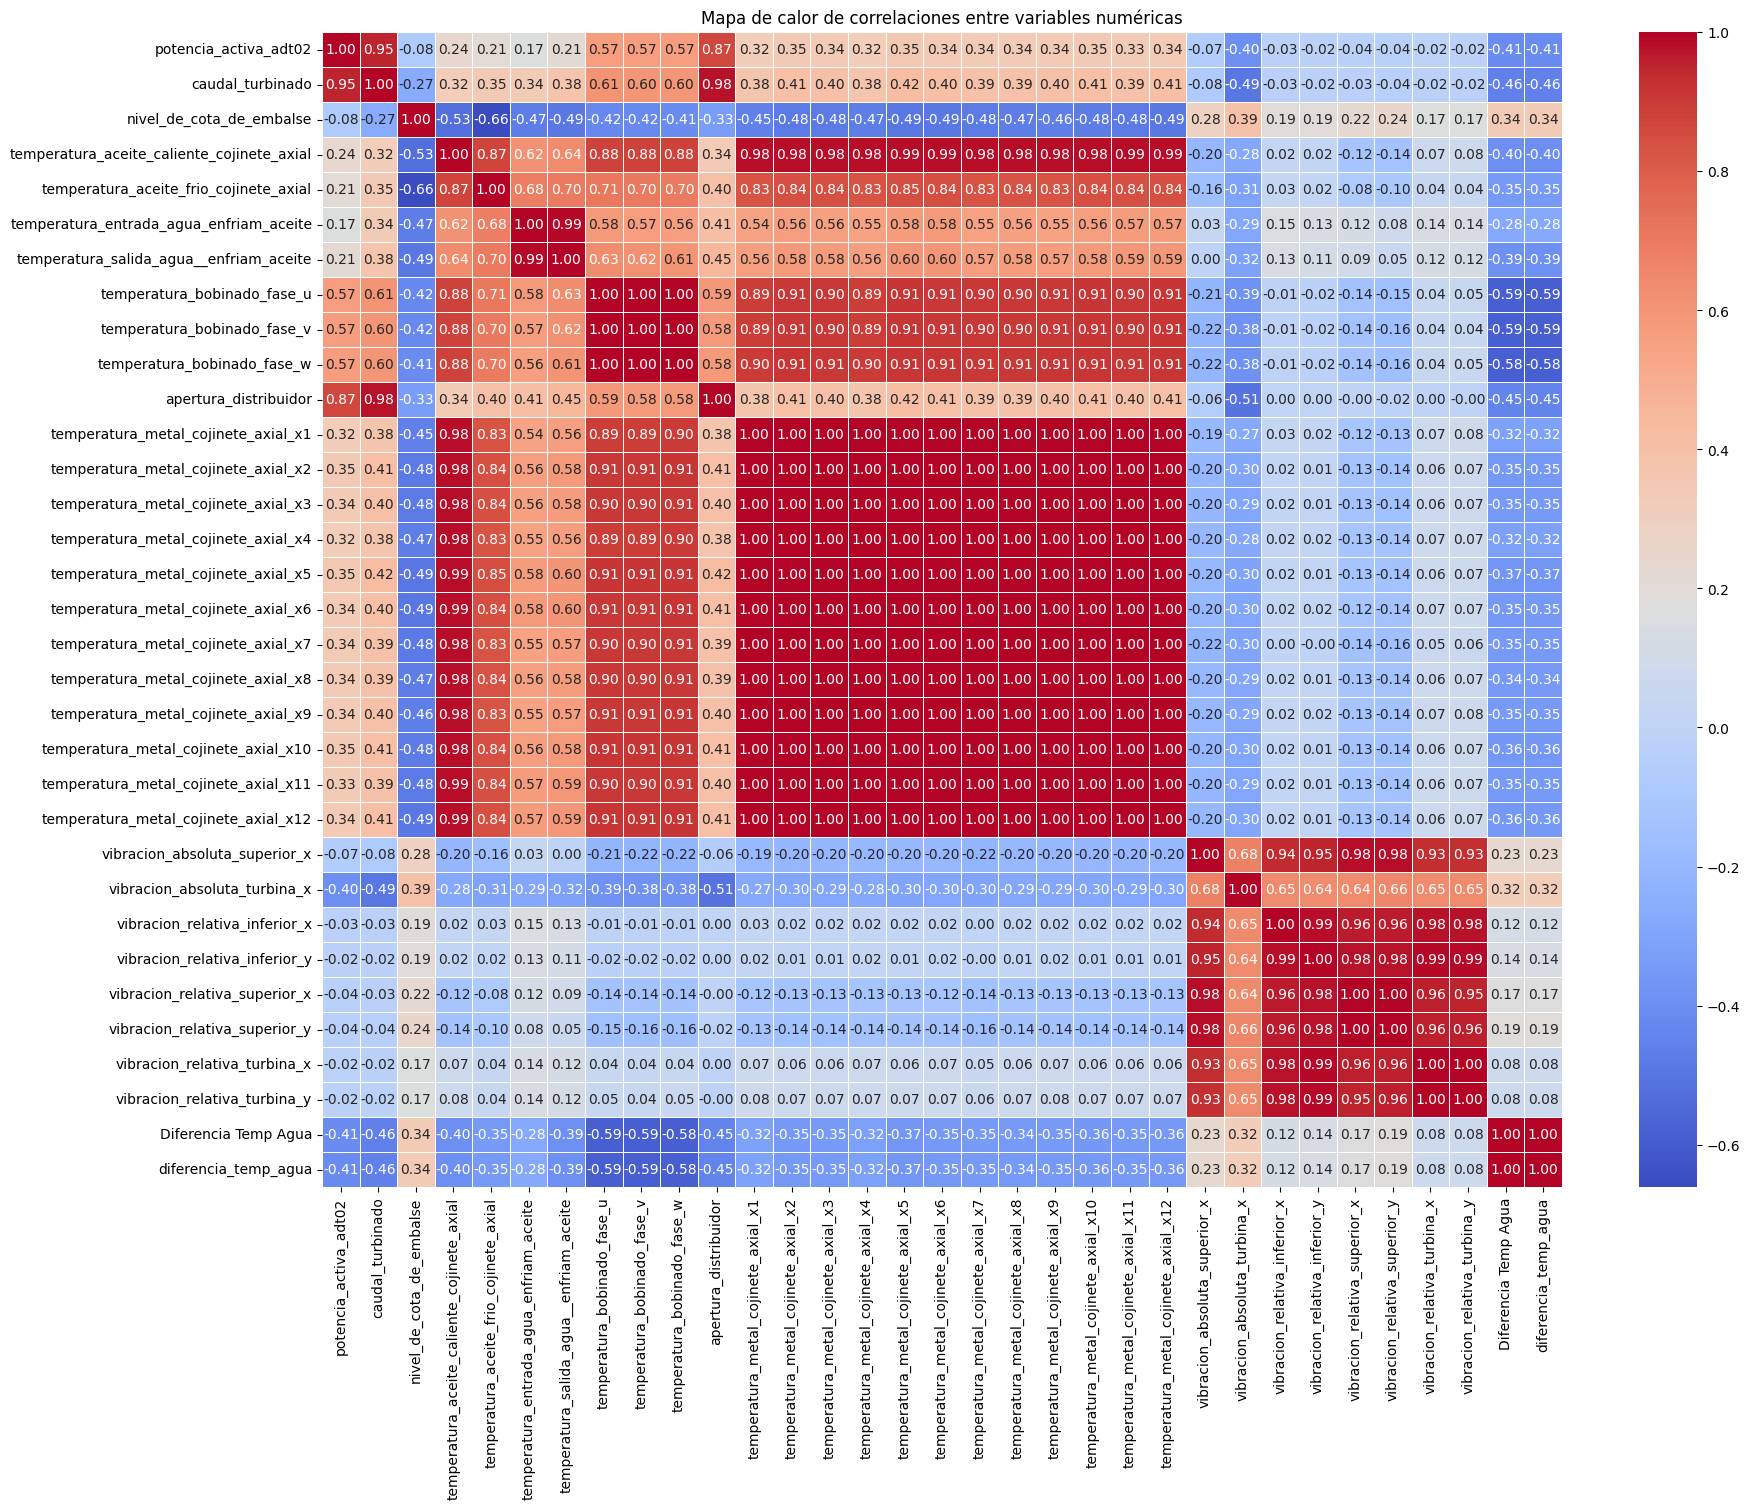

In [61]:
# Seleccionar solo las columnas numéricas para la matriz de correlación
df_numeric = df.select_dtypes(include=['number'])
# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(20, 15))
#sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.show()

Finalmente se presenta un mapa de calor para presentar el grado correlación que tienen entre sí todas las variables y permiten complementar los comentarios indicados a los gráficos anteriores.

En esta gráfico se puede observar lo siguiente:
- Altísima correlación entre temperaturas de cojinetes axiales (> 0.99): indican
comportamiento muy similar entre sensores. Posible redundancia de variables.

- Fuertes correlaciones entre vibraciones absolutas y relativas de turbina (> 0.95): validan que ambas medidas reflejan el mismo fenómeno, podrían agruparse o reducirse en análisis posteriores.